In [7]:
"""
Created on Fri Feb  2 21:32:05 2018

Data Incubator project: water usage and country/population stats
"""
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

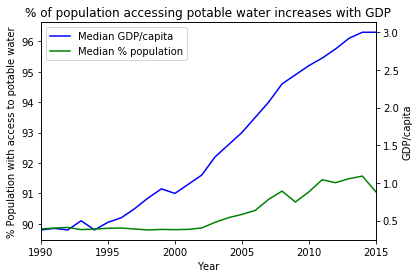

In [10]:
os.chdir('/Users/test2/Downloads')

potable = pd.read_csv('UNdata_Export_PercPotableWater.csv')
GDP = pd.read_csv('UNdata_Export_GDP.csv')
Pop = pd.read_csv('UNdata_Population.csv', encoding = 'Latin-1')
##########################################
# process population data
df_pop = Pop[Pop['Variant'].str.match('No change')]

##########################################
# process potable:
df_potable = potable.drop(['Value Footnotes'], axis = 1)
df_potable = df_potable.pivot(index='Year', columns='Country or Area', values='Value')
df_potable['medianPotable'] = df_potable.median(axis=1)
df_potable = df_potable.reset_index()
df_potable = df_potable[['medianPotable', 'Year']]

##########################################
# process GDP:
# delete Item column
df_GDP = GDP.drop(['Item'], axis = 1)

# divide by population to get GDP/capita
# group with population 
GDP_pop = pd.merge(left = df_GDP, right = df_pop, how = 'inner', left_on = ['Year', 'Country or Area'], right_on = ['Year', 'Country'])
GDP_pop['GDP per capita'] = GDP_pop['Value']/GDP_pop['Population']
GDP_pop = GDP_pop[['Year', 'Country', 'GDP per capita']]
GDP_pop = GDP_pop.pivot(index='Year', columns='Country', values='GDP per capita')

GDP_pop['medianGDP'] = GDP_pop.median(axis=1)
GDP_pop = GDP_pop.reset_index()
GDP_pop = GDP_pop[['Year', 'medianGDP']]

##########################################
# combined dataframe
combined = pd.merge(left = GDP_pop[['Year', 'medianGDP']], right = df_potable[['Year', 'medianPotable']], how = 'inner', on = 'Year')

# graphing
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

combined.plot(ax=ax1, x = 'Year', y='medianPotable', legend=False, color ='b')
combined.plot(ax=ax2, x = 'Year', y='medianGDP', legend=True, color='g')
ax1.set_ylabel('% Population with access to potable water')
ax2.set_ylabel('GDP/capita')

line_up, = plt.plot([2,2,3], label='Median GDP/capita', color = 'b')
line_down, = plt.plot([3,2,1], label='Median % population', color ='g')
plt.legend(handles=[line_up, line_down], loc = 'upper left')
plt.title('% of population accessing potable water increases with GDP')
plt.show()